In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

from model import encoder, decoder
from data_loader import DataLoaderforReconstOpt, DataLoaderforLatentOpt, DataLoaderforVocoder
from utils import connect, spectrum

from config import wave_len
from config import window_size
from config import data_dim
from config import latent_dim
from config import batch_size

(10370160, 2) 48000


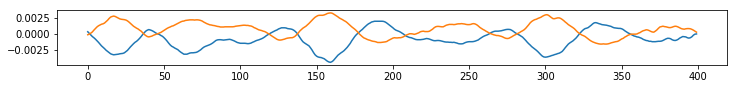

['../VoiceData/tamaneuta/trim_data/utama1.wav',
 '../VoiceData/tamaneuta/trim_data/utama2.wav',
 '../VoiceData/tamaneuta/trim_data/utama3.wav',
 '../VoiceData/tamaneuta/trim_data/utama4.wav',
 '../VoiceData/tamaneuta/trim_data/utama5.wav',
 '../VoiceData/tamaneuta/trim_data/utama6.wav',
 '../VoiceData/tamaneuta/trim_data/utama7.wav',
 '../VoiceData/tamaneuta/trim_data/utama8.wav',
 '../VoiceData/tamaneuta/trim_data/utama9.wav']

In [2]:
import soundfile as sf
import os

path = "../VoiceData/tamaneuta/trim_data/"
files = sorted(os.listdir(path))
files = [path + file for file in files]

data, rate = sf.read(files[0]) # rate == 48000 # samplerate:1秒あたりのフレーム数
print(data.shape, rate) # rateは最後のvocoder時に使う
plt.figure(figsize=(12,1))
plt.plot(data[10000:10000+wave_len])
plt.show()

files

In [3]:
inputs = tf.placeholder(tf.float32, (None, wave_len, data_dim))

with tf.variable_scope('encoder', reuse=tf.AUTO_REUSE):
    encoded = encoder(tf.reshape(inputs, (-1, wave_len, 1, data_dim)))

with tf.variable_scope('decoder', reuse=tf.AUTO_REUSE):
    decoded = tf.reshape(decoder(encoded), (-1, wave_len, data_dim))

variables =  tf.trainable_variables()
decoder_vars = [var for var in variables if 'decoder/' in var.name]

In [4]:
lr = 8e-4
beta1= 0.5
beta2 = 0.9

rec_loss = tf.reduce_mean(tf.pow(inputs - decoded, 2))
rec_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(rec_loss)

In [5]:
data_loader_rec = DataLoaderforReconstOpt(files)
# _ = data_loader_rec.load(0, DEMO=True)

In [6]:
data, _ = data_loader_rec.load(0)
data.shape

(3962, 2400, 2)

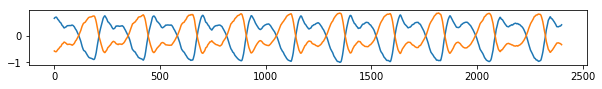

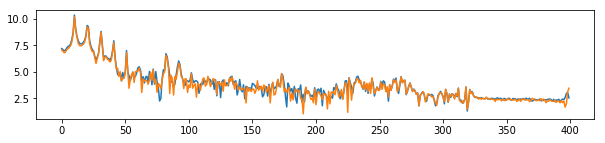

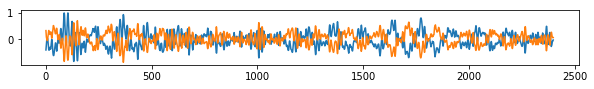

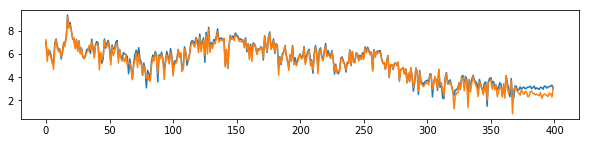

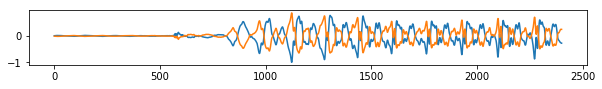

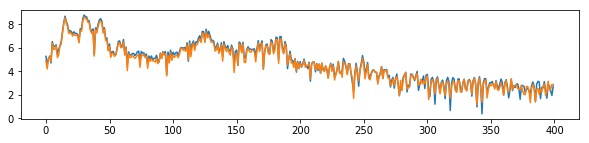

In [7]:
for _ in range(3):
    k = np.random.choice(len(data)); x = data[k];
    plt.figure(figsize=(10,1)); plt.plot(x); plt.show()
    x = np.array([spectrum(xi) for xi in x.T]).T
    plt.figure(figsize=(10,2)); plt.plot(x); plt.show()

In [8]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

saver = tf.train.Saver() # tf.train.Saver(decoder_vars)
# saver.restore(sess, './model/model-3')

epoch = 0

In [9]:
max_epoch = 10

In [10]:
from tqdm import tqdm

data_loader_rec = DataLoaderforReconstOpt(files)

for _ in range(epoch, max_epoch):    
    for file in range(len(files)):
        data, _ = data_loader_rec.load(file)
        rec_loss_hist = []
        for index in tqdm(range(0,len(data), batch_size)):
            batch = data[index:index+batch_size] # (128, 2400, 2)
            batch = np.array([np.array([spectrum(xi) for xi in x.T]).T for x in batch]) # (128, 400, 2)
            _, _rec_loss = sess.run([rec_opt, rec_loss], {inputs: batch})
            
            rec_loss_hist.append(_rec_loss)
        print("epoch:", epoch+1, "file:", file+1, ", rec_loss:", np.mean(rec_loss_hist))
    saver.save(sess, './model/model', global_step=epoch+1)
    epoch += 1

100%|██████████| 32/32 [00:04<00:00,  6.49it/s]


epoch: 1 file: 1 , rec_loss: 16.679562


100%|██████████| 34/34 [00:04<00:00,  6.98it/s]


epoch: 1 file: 2 , rec_loss: 3.5463562


  0%|          | 0/32 [00:00<?, ?it/s]

epoch: 1 file: 3 , rec_loss: 1.1188889


  0%|          | 0/33 [00:00<?, ?it/s]

epoch: 1 file: 4 , rec_loss: 1.1266184


  0%|          | 0/35 [00:00<?, ?it/s]

epoch: 1 file: 5 , rec_loss: 1.0879363


  0%|          | 0/34 [00:00<?, ?it/s]

epoch: 1 file: 6 , rec_loss: 1.1465148


  0%|          | 0/32 [00:00<?, ?it/s]

epoch: 1 file: 7 , rec_loss: 1.1444167


  0%|          | 0/31 [00:00<?, ?it/s]

epoch: 1 file: 8 , rec_loss: 1.1318674


100%|██████████| 31/31 [00:04<00:00,  7.16it/s]


epoch: 1 file: 9 , rec_loss: 1.0907036


  0%|          | 0/34 [00:00<?, ?it/s]

epoch: 2 file: 1 , rec_loss: 1.0289721


  0%|          | 0/33 [00:00<?, ?it/s]

epoch: 2 file: 2 , rec_loss: 1.0801404


  0%|          | 0/32 [00:00<?, ?it/s]

epoch: 2 file: 3 , rec_loss: 1.085292


  0%|          | 0/33 [00:00<?, ?it/s]

epoch: 2 file: 4 , rec_loss: 1.1092188


  0%|          | 0/35 [00:00<?, ?it/s]

epoch: 2 file: 5 , rec_loss: 1.0901961


  0%|          | 0/34 [00:00<?, ?it/s]

epoch: 2 file: 6 , rec_loss: 1.1537572


  0%|          | 0/32 [00:00<?, ?it/s]

epoch: 2 file: 7 , rec_loss: 1.1484932


  0%|          | 0/31 [00:00<?, ?it/s]

epoch: 2 file: 8 , rec_loss: 1.126774


100%|██████████| 31/31 [00:04<00:00,  7.33it/s]


epoch: 2 file: 9 , rec_loss: 1.0986427


  0%|          | 0/34 [00:00<?, ?it/s]

epoch: 3 file: 1 , rec_loss: 1.0386446


  0%|          | 0/33 [00:00<?, ?it/s]

epoch: 3 file: 2 , rec_loss: 1.09188


  0%|          | 0/32 [00:00<?, ?it/s]

epoch: 3 file: 3 , rec_loss: 1.0731831


  0%|          | 0/33 [00:00<?, ?it/s]

epoch: 3 file: 4 , rec_loss: 1.1108934


  0%|          | 0/35 [00:00<?, ?it/s]

epoch: 3 file: 5 , rec_loss: 1.0791584


  0%|          | 0/34 [00:00<?, ?it/s]

epoch: 3 file: 6 , rec_loss: 1.1496514


  0%|          | 0/32 [00:00<?, ?it/s]

epoch: 3 file: 7 , rec_loss: 1.1363238


  0%|          | 0/31 [00:00<?, ?it/s]

epoch: 3 file: 8 , rec_loss: 1.1420724


100%|██████████| 31/31 [00:04<00:00,  7.14it/s]


epoch: 3 file: 9 , rec_loss: 1.1227895


  0%|          | 0/34 [00:00<?, ?it/s]

epoch: 4 file: 1 , rec_loss: 1.0197892


  0%|          | 0/33 [00:00<?, ?it/s]

epoch: 4 file: 2 , rec_loss: 1.0890093


  0%|          | 0/32 [00:00<?, ?it/s]

epoch: 4 file: 3 , rec_loss: 1.0749543


  0%|          | 0/33 [00:00<?, ?it/s]

epoch: 4 file: 4 , rec_loss: 1.1093677


  0%|          | 0/35 [00:00<?, ?it/s]

epoch: 4 file: 5 , rec_loss: 1.0863708


  0%|          | 0/34 [00:00<?, ?it/s]

epoch: 4 file: 6 , rec_loss: 1.1519381


  0%|          | 0/32 [00:00<?, ?it/s]

epoch: 4 file: 7 , rec_loss: 1.1482075


  0%|          | 0/31 [00:00<?, ?it/s]

epoch: 4 file: 8 , rec_loss: 1.1195045


100%|██████████| 31/31 [00:03<00:00,  7.91it/s]


epoch: 4 file: 9 , rec_loss: 1.0901352


  0%|          | 0/35 [00:00<?, ?it/s]

epoch: 5 file: 1 , rec_loss: 1.0292628


  0%|          | 0/33 [00:00<?, ?it/s]

epoch: 5 file: 2 , rec_loss: 1.0892019


  0%|          | 0/32 [00:00<?, ?it/s]

epoch: 5 file: 3 , rec_loss: 1.0920208


  0%|          | 0/33 [00:00<?, ?it/s]

epoch: 5 file: 4 , rec_loss: 1.1130681


  0%|          | 0/35 [00:00<?, ?it/s]

epoch: 5 file: 5 , rec_loss: 1.1049553


  0%|          | 0/34 [00:00<?, ?it/s]

epoch: 5 file: 6 , rec_loss: 1.1451265


  0%|          | 0/32 [00:00<?, ?it/s]

epoch: 5 file: 7 , rec_loss: 1.1525255


  0%|          | 0/31 [00:00<?, ?it/s]

epoch: 5 file: 8 , rec_loss: 1.1154653


100%|██████████| 31/31 [00:04<00:00,  7.26it/s]


epoch: 5 file: 9 , rec_loss: 1.0962725


  0%|          | 0/35 [00:00<?, ?it/s]

epoch: 6 file: 1 , rec_loss: 1.0617435


  0%|          | 0/33 [00:00<?, ?it/s]

epoch: 6 file: 2 , rec_loss: 1.0732383


  0%|          | 0/32 [00:00<?, ?it/s]

epoch: 6 file: 3 , rec_loss: 1.0929168


  0%|          | 0/33 [00:00<?, ?it/s]

epoch: 6 file: 4 , rec_loss: 1.1212815


  0%|          | 0/35 [00:00<?, ?it/s]

epoch: 6 file: 5 , rec_loss: 1.0916703


  0%|          | 0/34 [00:00<?, ?it/s]

epoch: 6 file: 6 , rec_loss: 1.1484551


100%|██████████| 34/34 [00:04<00:00,  7.52it/s]


epoch: 6 file: 7 , rec_loss: 1.1400521


  0%|          | 0/31 [00:00<?, ?it/s]

epoch: 6 file: 8 , rec_loss: 1.1341813


100%|██████████| 31/31 [00:04<00:00,  7.18it/s]


epoch: 6 file: 9 , rec_loss: 1.106453


  0%|          | 0/34 [00:00<?, ?it/s]

epoch: 7 file: 1 , rec_loss: 1.0546494


  0%|          | 0/33 [00:00<?, ?it/s]

epoch: 7 file: 2 , rec_loss: 1.0913413


  0%|          | 0/32 [00:00<?, ?it/s]

epoch: 7 file: 3 , rec_loss: 1.0840042


  0%|          | 0/33 [00:00<?, ?it/s]

epoch: 7 file: 4 , rec_loss: 1.1031501


  0%|          | 0/35 [00:00<?, ?it/s]

epoch: 7 file: 5 , rec_loss: 1.0825735


  0%|          | 0/34 [00:00<?, ?it/s]

epoch: 7 file: 6 , rec_loss: 1.1411927


  0%|          | 0/32 [00:00<?, ?it/s]

epoch: 7 file: 7 , rec_loss: 1.1488539


  0%|          | 0/31 [00:00<?, ?it/s]

epoch: 7 file: 8 , rec_loss: 1.136219


100%|██████████| 31/31 [00:03<00:00,  7.86it/s]


epoch: 7 file: 9 , rec_loss: 1.0699849


  0%|          | 0/34 [00:00<?, ?it/s]

epoch: 8 file: 1 , rec_loss: 1.0082971


  0%|          | 0/33 [00:00<?, ?it/s]

epoch: 8 file: 2 , rec_loss: 1.0861582


  0%|          | 0/32 [00:00<?, ?it/s]

epoch: 8 file: 3 , rec_loss: 1.0894252


  0%|          | 0/33 [00:00<?, ?it/s]

epoch: 8 file: 4 , rec_loss: 1.1109542


  0%|          | 0/35 [00:00<?, ?it/s]

epoch: 8 file: 5 , rec_loss: 1.0771027


  0%|          | 0/34 [00:00<?, ?it/s]

epoch: 8 file: 6 , rec_loss: 1.1402425


  0%|          | 0/32 [00:00<?, ?it/s]

epoch: 8 file: 7 , rec_loss: 1.14321


  0%|          | 0/31 [00:00<?, ?it/s]

epoch: 8 file: 8 , rec_loss: 1.1181986


100%|██████████| 31/31 [00:04<00:00,  7.33it/s]


epoch: 8 file: 9 , rec_loss: 1.09377


  0%|          | 0/35 [00:00<?, ?it/s]

epoch: 9 file: 1 , rec_loss: 1.0377364


  0%|          | 0/33 [00:00<?, ?it/s]

epoch: 9 file: 2 , rec_loss: 1.0776626


  0%|          | 0/32 [00:00<?, ?it/s]

epoch: 9 file: 3 , rec_loss: 1.0738791


  0%|          | 0/33 [00:00<?, ?it/s]

epoch: 9 file: 4 , rec_loss: 1.117585


  0%|          | 0/35 [00:00<?, ?it/s]

epoch: 9 file: 5 , rec_loss: 1.1007297


  0%|          | 0/34 [00:00<?, ?it/s]

epoch: 9 file: 6 , rec_loss: 1.1447742


  0%|          | 0/32 [00:00<?, ?it/s]

epoch: 9 file: 7 , rec_loss: 1.1454691


  0%|          | 0/31 [00:00<?, ?it/s]

epoch: 9 file: 8 , rec_loss: 1.1179545


100%|██████████| 31/31 [00:04<00:00,  7.28it/s]


epoch: 9 file: 9 , rec_loss: 1.1111525


  0%|          | 0/35 [00:00<?, ?it/s]

epoch: 10 file: 1 , rec_loss: 0.99963564


  0%|          | 0/33 [00:00<?, ?it/s]

epoch: 10 file: 2 , rec_loss: 1.0709578


  0%|          | 0/32 [00:00<?, ?it/s]

epoch: 10 file: 3 , rec_loss: 1.0989789


  0%|          | 0/33 [00:00<?, ?it/s]

epoch: 10 file: 4 , rec_loss: 1.1197119


  0%|          | 0/35 [00:00<?, ?it/s]

epoch: 10 file: 5 , rec_loss: 1.0926605


  0%|          | 0/34 [00:00<?, ?it/s]

epoch: 10 file: 6 , rec_loss: 1.1482254


  0%|          | 0/32 [00:00<?, ?it/s]

epoch: 10 file: 7 , rec_loss: 1.1349012


  0%|          | 0/31 [00:00<?, ?it/s]

epoch: 10 file: 8 , rec_loss: 1.1186793


100%|██████████| 31/31 [00:03<00:00,  7.85it/s]


epoch: 10 file: 9 , rec_loss: 1.1054484


In [11]:
saver.save(sess, './model/model', global_step=epoch)

'./model/model-10'

inputs -> decoded
amp: 0.014556884765625


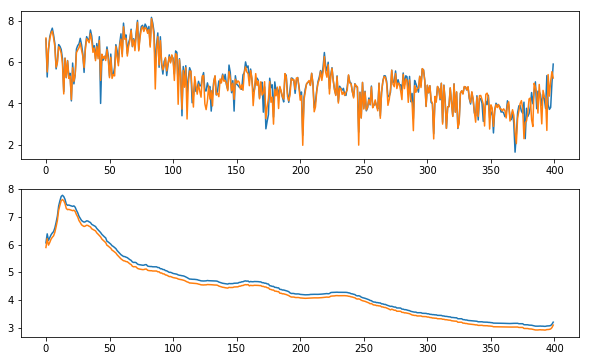

amp: 0.038726806640625


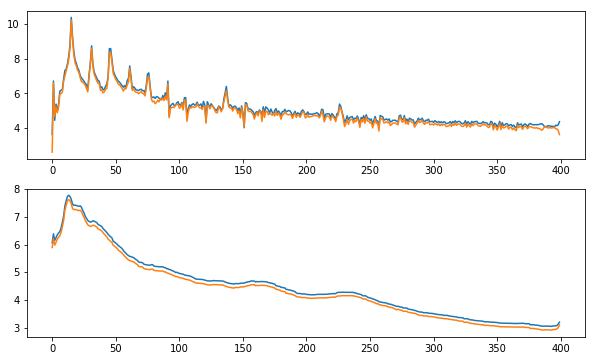

amp: 0.026092529296875


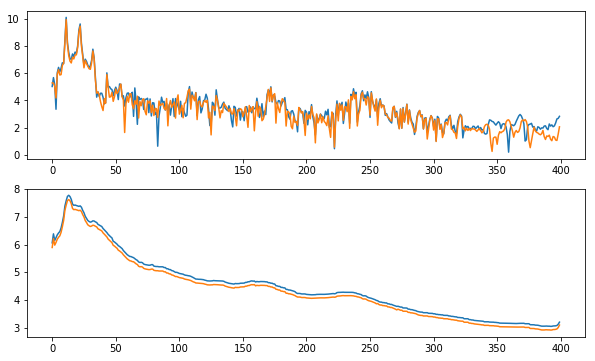

amp: 0.01080322265625


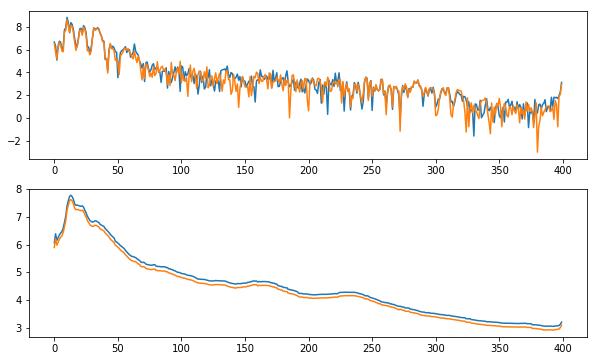

In [13]:
data_loader_rec = DataLoaderforReconstOpt(files)
data, amp = data_loader_rec.load(0)

print("inputs -> decoded")

for i in range(4):

    index = np.random.choice(len(data))
    batch = data[index:index+batch_size] # (128, 2400, 2)
    batch = np.array([np.array([spectrum(xi) for xi in x.T]).T for x in batch])
    a = amp[index]
    print("amp:", a)
    
    x = batch[0]
    _x = x.reshape(wave_len, data_dim)
    plt.figure(figsize=(10,6));
    plt.subplot(2,1,1); plt.plot(_x);

    x = sess.run(decoded, {inputs: batch})
    plt.subplot(2,1,2); plt.plot(x[0]); plt.show()

In [15]:
sess.run(encoded, {inputs: batch})[0]

array([-1.,  1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,
        1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,
       -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1.],
      dtype=float32)